# Libraries and Environment

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import heapq
from scipy import spatial
from scipy.spatial import distance
from tqdm.notebook import tqdm, trange
import copy
import random
import cv2
from tqdm.notebook import tqdm, trange

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import CIFAR10 Dataset

In [ ]:
# function for unpickling the CIFAR10 dataset
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

Note: Each row of the "images" array produced below stores one of the 60,000 32x32 color images. The first 1024 entries contain the red channel values, the next 1024 the green, and the final 1024 the blue. The image is stored in row-major order, so that the first 32 entries of the array are the red channel values of the first row of the image.

In [ ]:
# # import CIFAR10 image batches
# DATA_ROOT = "/content/drive/Shareddrives/504 Project/CIFAR10/cifar-10-batches-py/"
# batch1 = unpickle(DATA_ROOT + "data_batch_1")
# batch2 = unpickle(DATA_ROOT + "data_batch_2")
# batch3 = unpickle(DATA_ROOT + "data_batch_3")
# batch4 = unpickle(DATA_ROOT + "data_batch_4")
# batch5 = unpickle(DATA_ROOT + "data_batch_5")
# test_batch = unpickle(DATA_ROOT + "test_batch")

# images = np.concatenate([batch1[b'data'], batch2[b'data'], batch3[b'data'], batch4[b'data'], batch5[b'data'], test_batch[b'data']])

# # confirm correct size of data array
# print("Data dimensions: ", np.shape(images))

# import CIFAR10 image batches
DATA_ROOT = "/content/drive/Shareddrives/504 Project/CIFAR10/cifar-10-batches-py/"
batch1 = unpickle(DATA_ROOT + "data_batch_1")
batch2 = unpickle(DATA_ROOT + "data_batch_2")
batch3 = unpickle(DATA_ROOT + "data_batch_3")
batch4 = unpickle(DATA_ROOT + "data_batch_4")
batch5 = unpickle(DATA_ROOT + "data_batch_5")
test_batch = unpickle(DATA_ROOT + "test_batch")

images = np.concatenate([batch1[b'data'], batch2[b'data'], batch3[b'data'], batch4[b'data'], batch5[b'data'], test_batch[b'data']])
labels = np.concatenate([batch1[b'labels'], batch2[b'labels'], batch3[b'labels'], batch4[b'labels'], batch5[b'labels'], test_batch[b'labels']])


# convert image bytes to imgs
images_rgb = np.zeros((len(images), 32, 32, 3))
for i in range(len(images)):
  im = images[i]
  im_r = im[0:1024].reshape(32, 32)
  im_g = im[1024:2048].reshape(32, 32)
  im_b = im[2048:].reshape(32, 32)
  im_rgb = np.dstack((im_r, im_g, im_b)) / 255.0
  images_rgb[i,:,:,:] = im_rgb
  
images = images_rgb

# confirm correct size of data array
print("Data dimensions: ", np.shape(images))

Data dimensions:  (60000, 32, 32, 3)


# Visualize CIFAR

In [ ]:
## functions for displaying cifar images
# def cifar10_plot_single(data, im_idx=0):
#     im = data[im_idx, :]
    
#     im_r = im[0:1024].reshape(32, 32)
#     im_g = im[1024:2048].reshape(32, 32)
#     im_b = im[2048:].reshape(32, 32)

#     img = np.dstack((im_r, im_g, im_b))

#     print("shape: ", img.shape)        
    
#     plt.imshow(img) 
#     plt.show()
def cifar10_plot_single(data, im_idx=0):
    img = data[im_idx]    
    plt.imshow(img) 

# def cifar10_plot_examples(data):
  
#   for i in range(9):
#     im = data[i, :]
#     im_r = im[0:1024].reshape(32, 32)
#     im_g = im[1024:2048].reshape(32, 32)
#     im_b = im[2048:].reshape(32, 32)

#     img = np.dstack((im_r, im_g, im_b))
#     # define subplot
#     plt.subplot(330 + 1 + i)
#     # plot 
#     plt.imshow(img)
def cifar10_plot_examples(data):
  
  for i in range(9):
    img = data[i]
    # define subplot
    plt.subplot(330 + 1 + i)
    # plot 
    plt.imshow(img)

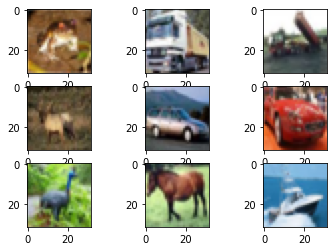

In [ ]:
cifar10_plot_examples(images)

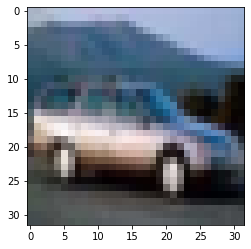

In [ ]:
cifar10_plot_single(images, im_idx=4)

# Perform Dimensionality Reduction on Image Feature Vectors

In [ ]:
# FAHAD TO PUT IMAGE REDUCTION STUFF HERE

#Functions for PCA

# returns image feature vectors reduced to PCA component count in n_components
# also returns 'recovered' images for comparison, transformed from the reduced set back to original 32x32 space
# def pca_reduce(images, n_components):
#   pca = PCA(n_components = n_components)
#   images_reduced = pca.fit_transform(images)
#   images_recovered = pca.inverse_transform(images_reduced)
  
#   print("Image data reduced from: {} to {}".format(images.shape, images_reduced.shape))
#   print()
#   print("Explained variance ratio of each component: ")
#   print(pca.explained_variance_ratio_)
  
#   return images_reduced, images_recovered

# # to inspect the PCA predicted images
# def plot_pca_image(images, images_recovered, idx = 1):
#     cifar10_plot_single(images, im_idx= idx)
#     cifar10_plot_single(images_recovered.astype(int), im_idx = idx)
# Functions for PCA

# returns image feature vectors reduced to PCA component count in n_components
# also returns 'recovered' images for comparison, transformed from the reduced set back to original 32x32 space
def pca_reduce(images, n_components):
  pca = PCA(n_components = n_components)

  flat_grays = np.zeros((len(images), 1024))
  for i in range(len(images)):
    img = (images[i]*255).astype('uint8')
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    flat_grays[i] = gray.flatten()

  print(flat_grays.shape)
  images_reduced = pca.fit_transform(flat_grays)
  images_recovered = pca.inverse_transform(images_reduced)
  
  print("Image data reduced from: {} to {}".format(images.shape, images_reduced.shape))
  print()
  print("Explained variance ratio of each component: ")
  print(pca.explained_variance_ratio_)
  plt.plot(pca.explained_variance_ratio_)
  plt.show()
  plt.grid()
  plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
  plt.xlabel('Number of components')
  plt.ylabel('Explained variance')
  plt.show()
  
  return pca, images_reduced, images_recovered

# to inspect the PCA predicted images
def plot_pca_image(images, images_recovered, idx = 1):
    plt.subplot(1, 2, 1)
    cifar10_plot_single(images, im_idx= idx)
    plt.subplot(1, 2, 2)
    cifar10_plot_single(images_recovered.astype(int), im_idx = idx)
    plt.show()

(60000, 1024)
Image data reduced from: (60000, 32, 32, 3) to (60000, 20)

Explained variance ratio of each component: 
[0.30495241 0.12407202 0.07349322 0.0409553  0.03129289 0.03023718
 0.0240765  0.02290549 0.01621097 0.01450675 0.01194305 0.01176234
 0.0112038  0.01029701 0.00911463 0.00793329 0.00724074 0.00662715
 0.00658537 0.00554349]


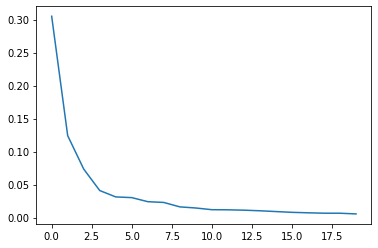

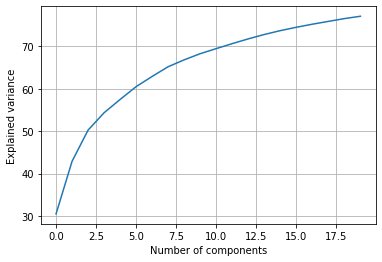

In [ ]:
dimensions = 20 
pca, images_reduced, images_recovered = pca_reduce(images, dimensions)
#plot_pca_image(images, images_recovered, idx = 4)

# Data Structure Class Definitions

## kd-Tree

In [ ]:
class kdNode:
  """
  Nodes used to store data in the kd-tree.

  data_idx: the row index of the image represented by the node in the tree's dataset
  discriminator: the feature dimension used to split the kd-tree at the node's level
  """
  def __init__(self, data_idx, discriminator, lchild=None, rchild=None):
    self.data_idx = data_idx
    self.discriminator = discriminator
    self.lchild = lchild
    self.rchild = rchild
    
  def __repr__(self):
    return f"Node with Index {self.data_idx}"


class knnHeapNode:
  """
  Object used to keep track of kNNs during kdTree.find_kNN()
  """
  def __init__(self, kdnode, L2Dist):
    self.node = kdnode
    self.L2Dist = L2Dist

  # override the less-than operator to change heapq from min heap to max heap when made of knnHeapNodes
  def __lt__(self, other):
    return self.L2Dist > other.L2Dist

  def __repr__(self):
    return f"(Node Index: {self.node.data_idx}, L2 Distance: {self.L2Dist})"


class kdTree:
  
  def __init__(self):
    self.root = None
    self.data = None

  def builder(self, data, discriminator=0):
    """
    Called by the build_tree function to construct the kd-tree
    """

    num_samples = len(data)
    kdim = len(data[0][1])
    median_idx = num_samples // 2
    
    # sort data according to feature column indexed by discriminator
    data = sorted(data, key=lambda x: x[1][discriminator])

    # find first occurrence of median value for discriminator dimension
    median = data[median_idx][1][discriminator]

    while median_idx > 0 and median == data[median_idx-1][1][discriminator]:
      median_idx = median_idx-1

    # create root node for tree
    node = kdNode(data_idx=data[median_idx][0], discriminator=discriminator)

    # calculate discriminator index for next level
    next_discriminator = (discriminator + 1) % kdim

    # add left subtree containing vectors[discriminator] < median and right subtree containing vectors[discriminator] >= median to root
    if median_idx > 0:
      node.lchild = self.builder(data[:median_idx], next_discriminator)
    if num_samples - (median_idx + 1) > 0:
      node.rchild = self.builder(data[median_idx+1:], next_discriminator)

    return node

  def build_tree(self, data):
    """
    Called by the user to initialize the kd-tree using the provided dataset
    """
    self.data = copy.deepcopy(data)
    self.root = self.builder(data)

  def find_kNN(self, k, query_vec, node=None, kNN=None):
    """
    Find and return a list of the query_vec's k nearest neighbors in the tree's dataset
    
    NOTE: kNN is returned as a max heap of knnHeapNodes, so in order to get the 
    final list in increasing order of L2 dist, the final output must be reverse-sorted 
    using sorted(kNN, reverse=True)
    """
    
    if node == None:
      node = self.root
    
    # create max heap for tracking node values and associated L2 distances of k nearest neighbors
    if kNN == None:
      kNN = []
      heapq.heapify(kNN)

    # extract feature vector from tuple in reference data
    feat_vec = self.data[node.data_idx][1]

    # calculate L2 distance between query_vec and the current node
    dist = distance.euclidean(query_vec, feat_vec)

    if len(kNN) < k:
      heapq.heappush(kNN, knnHeapNode(node, dist))
    else:
      if dist < kNN[0].L2Dist:
        heapq.heapreplace(kNN, knnHeapNode(node, dist))

    # determine best direction to traverse tree
    discriminator = node.discriminator

    if query_vec[discriminator] < feat_vec[discriminator]:
      good_side = node.lchild
      bad_side = node.rchild
    else:
      good_side = node.rchild
      bad_side = node.lchild

    # traverse good side
    if good_side != None:
      kNN = self.find_kNN(k, query_vec, node=good_side, kNN=kNN)

    # determine if the bad side is worth exploring by checking the possibility of a shorter distance to the query on the bad side
    if bad_side != None and abs(query_vec[discriminator] - feat_vec[discriminator]) < kNN[0].L2Dist:
      kNN = self.find_kNN(k, query_vec, node=bad_side, kNN=kNN)

    # return max heap of k closest nodes
    return kNN

## Locality hashing

basing off: 
- https://github.com/kayzhu/LSHash/blob/master/lshash/lshash.py

- https://necromuralist.github.io/Neurotic-Networking/posts/nlp/machine-translation-with-locality-sensitive-hashing/

Remember to cite eventually....

In [ ]:
class LocalityHash:

  def __init__(self, hash_size, input_dim, num_tables = 1):
      
      """
        arg input_dim: the expected dimension of the data to be hashed
        arg hash_size: number of random hyperplanes that divide the space into hash buckets
        
        Info: What we are realy storing for hyperplanes is the norm of the planes, initialized randomly with standard normal distribution. 
        Points whose dot product with the norm have the same sign are on the same side of the plane.
      """
      self.hash_size = hash_size
      self.input_dim = input_dim
      self.num_tables = num_tables

      self.planes = [np.random.randn(self.hash_size, self.input_dim) for _ in range(self.num_tables)]
      self.hash_tables = [{} for _ in range(self.num_tables)]

      print("LSH initialized")
      print("Number of hash tables: {}".format(self.num_tables))
      print("Number of hyperplanes per table: {}".format(self.hash_size))
      print("Number of buckets per table: {}".format(2**(self.hash_size)))
  
  def get_hashkey(self, plane, input_point):

    """ 
      arg input point dimension = 1* input_dim

      Takes an input point and generates a hash key based on its location relative to the hyperplanes (In which bucket)
      Returns a binary string map of length self.hash_size (number of hyperplanes) where 1 = "above" hyperplane i and 0 = "below" hyperplane i
      looks like: "101010100"

    """
    location_projections = np.dot(plane, np.array(input_point))
        
        #if dot product of input point and hyper plane is positive, its 'above' in n-d space, if negative or 0, below
    hash_key = "".join(['1' if i > 0 else '0' for i in location_projections])

    return hash_key


  def insert_point(self, input_point, original_index):

    """
      arg input_point dimension = 1* input_dim
      arg original_index = reference to the index of the full size image for retrieval
    """

    info = (tuple(input_point), original_index)  #save point as tuple to save memory
    
    for i, hash_table in enumerate(self.hash_tables):
      key = self.get_hashkey(self.planes[i], input_point)

      if key in hash_table:
          hash_table[key].append(info)
      else:
          hash_table[key] = [info]

  
  def initialize(self, input_data, verbose = False):
    if len(input_data[0][1]) != self.input_dim:
        print("Input points should have dimension: 1 x {}".format(self.input_dim))
        return

    print("Initializing LSH from data...")

    for data in input_data:
      index, point = data
      self.insert_point(point, index)

    if verbose:
      count_str = "\nInserted:\n"
      for i, hash_table in enumerate(self.hash_tables):
        for bucket, item in hash_table.items():
            count_str += "{} items into bucket {} in hash table {}".format(str(len(item)), bucket, str(i+1))
            count_str += "\n"
        count_str += "\n"

      print(count_str)



  def get_knns(self, query_point, k, remove_first = False):
      
      candidates = set()

      for i, table in enumerate(self.hash_tables):
          key = self.get_hashkey(self.planes[i], query_point)
          if key in table:
            candidates.update(table[key])

      if len(candidates) <= 1:  #if query returns nothing or just the query point itself, return
        if len(candidates) == 0 or (tuple(candidates[0][0]) == tuple(query_point.tolist())):
          print("No neighbors found")
          return
    
      #add eucledian:
      candidates_aug = []
      for i, (point, index) in enumerate(candidates):
          dist = np.linalg.norm(np.array(point) - np.array(query_point))
          candidates_aug.append((point, index, dist))
      
      #sort on euclidean
      candidates_aug.sort(key=lambda x: x[2])

      ##trim if duplicates/remove same value:
      if remove_first:
        smallest_dist = candidates_aug[0][2]
        i = 0
        while i < len(candidates_aug) and smallest_dist == 0:
          candidates_aug = candidates_aug[i+1:]
          smallest_dist = candidates_aug[0][2]

      if len(candidates_aug) <= k:
        return candidates_aug
      else:
        return candidates_aug[:k]



## LSH helper functions

In [ ]:
#get only indexes of nearest neighbors
def get_neighbor_indexes(knns):
  indexes = []
  for n in knns:
    indexes.append(n[1])

  return indexes

def display_info(knns):
  for n in knns:
    print("Neighbor at idx {}, distance {}".format(n[1], round(n[2],4)))

# Populate Each Data Structure with CIFAR10 Data

In [ ]:
# test kd tree
ids = np.arange(images_reduced.shape[0])
images_reduced_ids = list(zip(list(ids), list(images_reduced)))

# try other similarity metrics - cross-correlation, mutual info, cosine similiarity 
# kdTree = KDTree(point_tups=images_reduced_ids, dim=images_reduced.shape[-1], dist_func=spatial.distance.cosine)

In [ ]:
#original data for lsh
images_flat = np.concatenate([batch1[b'data'], batch2[b'data'], batch3[b'data'], batch4[b'data'], batch5[b'data'], test_batch[b'data']])
images_tupled = []
for i, img in enumerate(images_flat):
  images_tupled.append((i, img))


In [ ]:
# FAHAD TO PUT REDUCED DATA INTO THE TREE
cifar_kdtree = kdTree()
cifar_kdtree.build_tree(images_reduced_ids)


#INITIALIZE LSH
hash_size = 9
num_tables = 20
lsh = LocalityHash(hash_size = hash_size , input_dim = images_flat.shape[1], num_tables = num_tables)
lsh.initialize(images_tupled)

LSH initialized
Number of hash tables: 20
Number of hyperplanes per table: 9
Number of buckets per table: 512
Initializing LSH from data...


## Test Basic Functionality

In [ ]:
# to get nearest neighbors of each type:
  # kd:
  # query = images_reduced[image_idx]
  # nn = cifar_kdtree.find_kNN(k=10, query_vec = query)
  # dist_k = nn[k].L2Dist
  # id_k = nn[k].node.data_idx

  # lsh:
  # query = images_tupled[image_idx][1]
  # nn = lsh.get_knns(query_point = query, k = 10)
  # dist_k = nn[k][2]
  # id_k = nn[k][1]


In [ ]:
# select distinace function, ED by default 
values = []
for i in range(0, 10, 3):
  image_idx = i
  query = images_reduced[image_idx]
  nn = cifar_kdtree.find_kNN(k=10, query_vec = query)
  kth_results = []
  sum = -1
  for k in range(0,10):
    # kth_reduced = kNN[k].node_value
    dist = nn[k].L2Dist
    id= nn[k].node.data_idx
    kth_results.append([id, dist])
    if labels[image_idx] == labels[id]:
      sum += 1

  print(sorted(kth_results,key=lambda x: x[1]))
  values.append(sum/10)
values = np.array(values)
values.sum()/ len(values)

[[0, 0.0], [52313, 523.0400300403675], [57591, 547.7342732704565], [14850, 550.9059186792825], [8709, 563.7204219123191], [40295, 565.5575258986048], [50418, 597.6937056182103], [50304, 605.9492396073596], [33280, 613.6498890780917], [24531, 621.7615649792147]]
[[3, 0.0], [41578, 504.2580159311594], [53199, 518.9655794931758], [44417, 523.4048786895999], [53032, 553.3791894186908], [39129, 565.1466019329313], [59430, 565.6035770695931], [46974, 572.8840694216017], [6035, 574.874943094126], [50663, 583.6381264723133]]
[[6, 0.0], [24734, 532.5226894131315], [36698, 759.6960518388149], [30551, 768.7778021247497], [31865, 777.0412153257704], [31601, 779.3900413727114], [48201, 829.6228914617201], [26573, 835.5044737666096], [27915, 835.8243377710909], [30317, 840.0289965432339]]
[[9, 0.0], [29621, 812.2696577290702], [39498, 855.4635368922534], [30674, 909.1558680478624], [25506, 909.717293933113], [20748, 918.3070219271918], [22162, 924.6293980987907], [49371, 948.9030294773014], [45745, 

0.19999999999999998

In [ ]:
values = []
for i in range(0, 10, 3):
  image_idx = i
  query = images_tupled[image_idx][1]
  nn = lsh.get_knns(query_point = query, k = 10)
  kth_results = []
  sum = -1
  for k in range(0,10):
    dist = nn[k][2]
    id= nn[k][1]
    kth_results.append([id, dist])
    if labels[image_idx] == labels[id]:
      sum += 1
  print(kth_results)
  values.append(sum/10)

values = np.array(values)
values.sum()/ len(values)

[[0, 0.0], [52182, 5402.9464183906175], [48724, 5411.572876715235], [15102, 5433.173842239911], [30602, 5463.806640063318], [39003, 5504.596533806996], [11326, 5540.049097255366], [31642, 5552.150844492609], [32057, 5581.350374237403], [50735, 5592.770869613737]]
[[3, 0.0], [56994, 4439.240025049333], [37369, 4439.724541004768], [42014, 4501.644699440417], [45517, 4504.314598249105], [13021, 4542.702059347498], [130, 4544.61835581383], [59639, 4551.133704913535], [48427, 4559.960964745203], [59947, 4564.68268338556]]
[[6, 0.0], [9008, 6025.87894003854], [17026, 6125.7779914064795], [20724, 6173.795348082085], [54858, 6267.917676549366], [50197, 6292.070406471943], [2176, 6307.345241858891], [47224, 6346.43112308012], [7515, 6366.97557714807], [7655, 6369.148294709426]]
[[9, 0.0], [4554, 5386.261412148504], [43221, 5421.284072984923], [21268, 5440.898822804923], [17303, 5555.613107479678], [48679, 5578.272582081302], [49012, 5583.027135882468], [54523, 5611.920972358752], [23565, 5629.5

0.15

# Test Search Query Performance

## Helper Functions

In [ ]:
def get_ground_truth_nns(query, num_kNN, data):
  """
  Brute force computation of the query's nearest neighbors in data matrix using L2 norm.
  
  Assumes data is a list of tuples of the form [(image_index, [features])].

  Returns list of tuples of the form [(image_index, L2Dist)], with tuples
  ordered from smallest L2 distance to largest L2 distance
  """
  # compute ground truth nn for query image
  true_nns = []
  for i, row in enumerate(data):
    dist = distance.euclidean(query, row)

    if len(true_nns) < num_kNN:
      true_nns.append((i, dist))
    else:
      biggest_dist = max(true_nns, key=lambda x:x[1])
      if dist < biggest_dist[1]:
        max_index = true_nns.index(biggest_dist)
        true_nns[max_index] = (i,dist)

  true_nns.sort(key=lambda x: x[1])
  return true_nns

## kd-Tree:

In [ ]:
import time
from operator import eq

sum = 0
sum2 = sum
del sum

num_neighbors = int(input("How many nearest neighbors for your image query?: "))

# chose random query image
rand_index = random.randint(0, len(images))
query_image = images_og[rand_index,:]
reduced_query = images_reduced[rand_index,:]

print("Query image: ")
cifar10_plot_single(images, rand_index)
# VISUALIZE KNNS FROM KD-TREE AND GROUND TRUTH IMAGES - NEEDS TO BE DONE
#true_nns = get_ground_truth_nns(query_image, num_neighbors, images_og)
start = time.time()
true_nns = get_ground_truth_nns(reduced_query, num_neighbors, images_reduced)
true_nns.sort(key = lambda x: x[1])
print(true_nns) 
end = time.time()
print("lsh benchmark: {}".format(end - start))
exemplars = []
exemplars_neighbor_list = []
for x in true_nns:
  exemplars.append(int(x[0]))
  exemplars_neighbor_list.append(str(x[0]))

print(exemplars)

for neighbor in exemplars:
  print(distance.euclidean(query_image, images_og[neighbor]))


start = time.time()
# find kNN for query image using kdTree
knn_kd = cifar_kdtree.find_kNN(k=num_neighbors, query_vec=reduced_query)
ordered_nn = sorted(knn_kd, reverse=True)
knn_kd = ordered_nn

# reduced neighbor distances
print(knn_kd)
kd_neighbor_list = []
# true non-reduced distances
for neighbor in knn_kd:
  print(distance.euclidean(query_image, images_og[int(str(neighbor.node).replace("Node with Index ", ""))]))
  kd_neighbor_list.append(int(str(neighbor.node).replace("Node with Index ", "")))

### DO STUFF
end = time.time()
print("kd benchmark: {}".format(end - start))

commons = 0 
for i in range(len(kd_neighbor_list)):
  for j in range(len(exemplars)):
    if kd_neighbor_list[i] == exemplars[j]:
      commons += 1
print("kd accuracy percentage {}".format(100*commons/num_neighbors))


How many nearest neighbors for your image query?: 10


NameError: ignored

## Locality Sensitive Hashing

In [ ]:
import time
from operator import eq

sum = 0
sum2 = sum
del sum

start = time.time()
knn_lsh = lsh.get_knns(reduced_query, num_neighbors)
knn_lsh = sorted(knn_kd, reverse=False)
lsh_neighbor_list = []
# true non-reduced distances
for neighbor in knn_lsh:
  print(distance.euclidean(query_image, images_og[int(str(neighbor.node).replace("Node with Index ", ""))]))
  lsh_neighbor_list.append(int(str(neighbor.node).replace("Node with Index ", "")))

# reduced neighbor distances
print(knn_lsh)
### DO STUFF
end = time.time()
print("lsh benchmark: {}".format(end - start))
commons = 0 
for i in range(len(lsh_neighbor_list)):
  for j in range(len(exemplars)):
    if lsh_neighbor_list[i] == exemplars[j]:
      commons += 1
print("lsh accuracy percentage {}".format(100*commons/num_neighbors))
